In [11]:
import torch


In [12]:
import torchvision

In [13]:
from torchvision import datasets,transforms

In [14]:
train=datasets.MNIST("",train=True, download=True,transform=transforms.Compose([transforms.ToTensor()]))

test=datasets.MNIST("",train=False, download=True,transform=transforms.Compose([transforms.ToTensor()]))


In [15]:
trainset=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset=torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [16]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

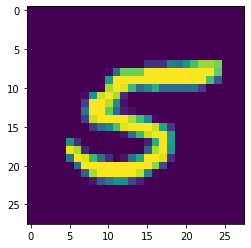

In [17]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))
plt.show()

In [23]:
total=0
counter={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for data in trainset:
    xs,ys=data
    for yc in ys:
        counter[int(yc)] +=1
        
        
        
print(counter)        


{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [25]:
import torch.nn as nn
import torch.nn.functional as fnn

In [35]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(28*28,64)
        self.fc2=nn.Linear(64,64)
        self.fc3=nn.Linear(64,64)
        self.fc4=nn.Linear(64,10)
        
        
    def forward(self,x):
        x=fnn.relu(self.fc1(x))
        x=fnn.relu(self.fc2(x))
        x=fnn.relu(self.fc3(x))
        x=self.fc4(x)
        return fnn.log_softmax(x,dim=1)
        
net=Net()
print(net)
        

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [36]:
X=torch.rand((28,28))
X=X.view(1,28*28)


In [37]:
output=net(X)

In [38]:
output

tensor([[-2.3283, -2.1291, -2.2861, -2.3747, -2.2759, -2.2892, -2.3978, -2.3568,
         -2.2572, -2.3585]], grad_fn=<LogSoftmaxBackward>)

In [44]:
import torch.optim as optim

optimizer=optim.Adam(net.parameters(),lr=0.001)

EPOCHS=4

for epoch in range(EPOCHS):
    for data in trainset:
        X,y=data
        net.zero_grad()
        output=net(X.view(-1,28*28))
        loss=fnn.nll_loss(output,y)
        loss.backward()
        optimizer.step()
        
    print(loss)    

tensor(0.0082, grad_fn=<NllLossBackward>)
tensor(0.0992, grad_fn=<NllLossBackward>)
tensor(0.5048, grad_fn=<NllLossBackward>)
tensor(0.0393, grad_fn=<NllLossBackward>)


In [45]:
correct=0
total=0

with torch.no_grad():
    for data in trainset:
        X,y=data
        output=net(X.view(-1,28*28))
        for idx,i in enumerate(output):
            if torch.argmax(i)== y[idx]:
                correct+=1
            total+=1   
            
            
print("Accuracy:",round(correct/total,4))           
        

Accuracy: 0.9825
